In [ ]:
import math, time, statistics, numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [18]:
def plot_points(points, title):
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    plt.figure(figsize=(5,5))
    plt.scatter(xs, ys, s=4)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(title)
    plt.xlabel("x"); plt.ylabel("y")
    plt.grid(True)
    plt.show()


In [19]:
def circle_polar_sincos(xc, yc, R):
    """
    Funcao que usa coordenadas polares para desenhar o circulo
    """

    # Conjunto para armazenar pixels visitados
    pixels = set()

    # Definicao do passo do angulo em radianos
    # - Quanto maior o raio, menor o passo (evita buracos)
    step = max(1.0 / (8*R if R>0 else 1), 0.0025)  # radians
    
    # Percorre todo a circunferencai de 0 a 2pi radianos
    t = 0.0
    while t < 2*math.pi + 1e-12:

        # Calculo da posicao do x e y
        x = int(round(xc + R * math.cos(t)))
        y = int(round(yc + R * math.sin(t)))

        # Escreve no set
        pixels.add((x, y))

        # Incrementa o passo
        t += step
    
    # Retorna os pixels marcados
    return pixels

In [20]:
def circle_midpoint_bresenham(xc, yc, R):
    """
    Funcao que usa o metodo incremental
    """
    pixels = set()

    # Comeca no ponto mais a diretia
    x = 0
    y = R

    # Parametro de decisao inicial
    d = 1 - R 

    # Funcao para plotar todos os pontos simetricos
    def plot8(x, y):
        pixels.add((xc + x, yc + y))
        pixels.add((xc + y, yc + x))
        pixels.add((xc + y, yc - x))
        pixels.add((xc + x, yc - y))
        pixels.add((xc - x, yc - y))
        pixels.add((xc - y, yc - x))
        pixels.add((xc - y, yc + x))
        pixels.add((xc - x, yc + y))
    
    # Plota os pontos iniciais
    plot8(x, y)

    # Percorre o primeiro octante
    while x < y:

        x += 1
        
        if d < 0:
            # O prox ponto esta dentro do circulo -> mov horizontal
            d += 2*x + 1
        else:
            # O prox ponto esta fora do circulo -> mov diagonal
            y -= 1
            d += 2*(x - y) + 1

        # Desenha os 8 pontos simetricos correspondentes
        plot8(x, y)
    return pixels

In [21]:
def time_method(func, radius, repeats=5):
    """
    Funcao que avalia o tempo do metodo passado em func 7 vezes e tira a media
    """
    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        _ = func(0, 0, radius)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return statistics.median(times), statistics.mean(times), min(times)

radius = [5, 10, 20, 40, 80, 160, 320]
results = []

# Para cada raio, calcular o tempo mediano, medio e minimo de cada metodo
for R in radius:
    med_p, mean_p, min_p = time_method(circle_polar_sincos, R, repeats=7)
    med_m, mean_m, min_m = time_method(circle_midpoint_bresenham, R, repeats=7)
    results.append({
        "radius": R,
        "polar_sin_cos_median_s": med_p,
        "polar_sin_cos_mean_s": mean_p,
        "polar_sin_cos_min_s": min_p,
        "midpoint_median_s": med_m,
        "midpoint_mean_s": mean_m,
        "midpoint_min_s": min_m,
        "speedup_midpoint_vs_polar (median)": (med_p / med_m) if med_m>0 else float("inf"),
    })

# Junta tudo em um dataframe e salva
df = pd.DataFrame(results)
csv_path = "data/circle_timing_comparison.csv"
df.to_csv(csv_path, index=False)

print(df)

   radius  polar_sin_cos_median_s  polar_sin_cos_mean_s  polar_sin_cos_min_s  \
0       5                0.001054              0.001103             0.000936   
1      10                0.002432              0.002565             0.002223   
2      20                0.004250              0.004173             0.002538   
3      40                0.005706              0.005582             0.004921   
4      80                0.006424              0.006797             0.006127   
5     160                0.006483              0.006529             0.006347   
6     320                0.006699              0.006717             0.006422   

   midpoint_median_s  midpoint_mean_s  midpoint_min_s  \
0           0.000029         0.000037        0.000027   
1           0.000041         0.000050        0.000038   
2           0.000052         0.000073        0.000048   
3           0.000099         0.000107        0.000095   
4           0.000204         0.000216        0.000194   
5           0.000

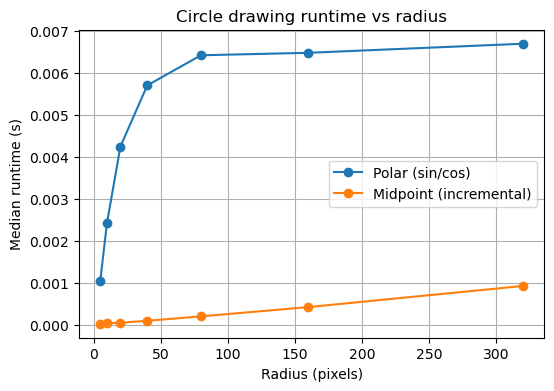

In [22]:
plt.figure(figsize=(6,4))
plt.plot(df["radius"], df["polar_sin_cos_median_s"], marker="o", label="Polar (sin/cos)")
plt.plot(df["radius"], df["midpoint_median_s"], marker="o", label="Midpoint (incremental)")
plt.xlabel("Radius (pixels)")
plt.ylabel("Median runtime (s)")
plt.title("Circle drawing runtime vs radius")
plt.legend()
plt.grid(True)
plt.show()

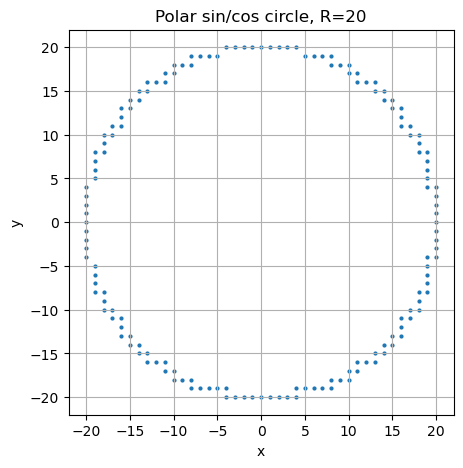

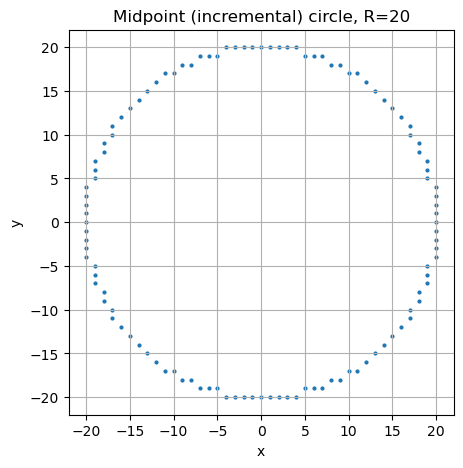

In [23]:
R_example = 20
pts_polar = circle_polar_sincos(0, 0, R_example)
plot_points(list(pts_polar), f"Polar sin/cos circle, R={R_example}")

pts_mid = circle_midpoint_bresenham(0, 0, R_example)
plot_points(list(pts_mid), f"Midpoint (incremental) circle, R={R_example}")